In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('car driving risk analysis.csv')
df.head()

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72


In [3]:
df.isnull().sum()

speed    0
risk     0
dtype: int64

In [4]:
df.head(20)

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72
5,115,10
6,50,7
7,230,85
8,190,45
9,260,91


In [5]:
df.tail(20)

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72
5,115,10
6,50,7
7,230,85
8,190,45
9,260,91


Text(0.5, 1.0, 'Car driving risk analysis')

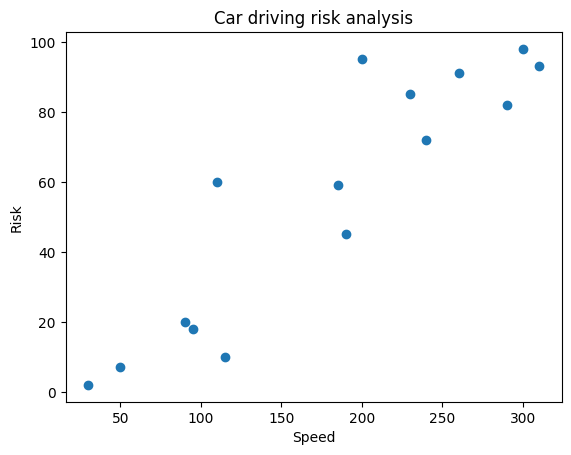

In [7]:
plt.scatter(df['speed'], df['risk'])
plt.xlabel('Speed')
plt.ylabel('Risk')
plt.title('Car driving risk analysis')

In [9]:
x = df.drop('risk', axis=1)
x.head()

,speed
0,200
1,90
2,300
3,110
4,240


In [10]:
y = df[['risk']]
y.head()

,risk
0,95
1,20
2,98
3,60
4,72


In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [12]:
x.mean()

speed    179.666667
dtype: float64

In [13]:
y.mean()

risk    55.8
dtype: float64

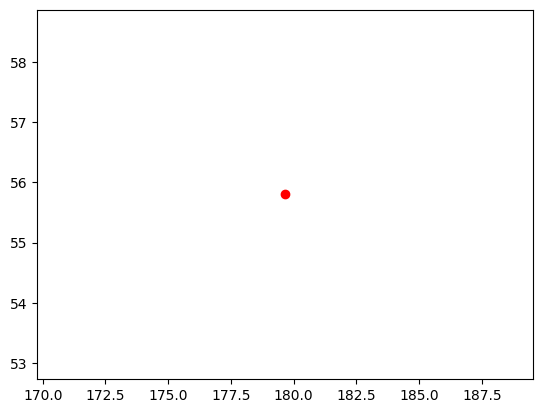

In [15]:
plt.scatter(x.mean(), y.mean(), color='red')

Text(0.5, 1.0, 'Car driving risk analysis')

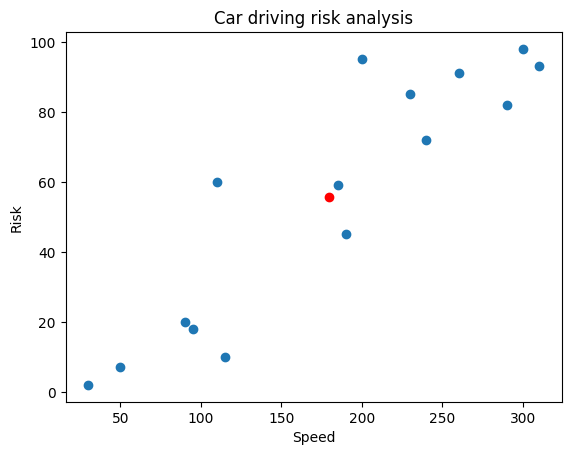

In [16]:
plt.scatter(x.mean(), y.mean(), color='red')

plt.scatter(df['speed'], df['risk'])
plt.xlabel('Speed')
plt.ylabel('Risk')
plt.title('Car driving risk analysis')

In [17]:
# train the model
reg.fit(x, y)

LinearRegression()

In [18]:
m = reg.coef_
m

array([[0.35131645]])

In [19]:
c = reg.intercept_
c

array([-7.31985478])

In [20]:
m * 278 + c

array([[90.34611718]])

In [21]:
reg.predict([[278]])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[90.34611718]])

In [22]:
df['Predicted_y'] = reg.predict(x)
df.head()

,speed,risk,Predicted_y
0,200,95,62.943434
1,90,20,24.298625
2,300,98,98.075079
3,110,60,31.324954
4,240,72,76.996092


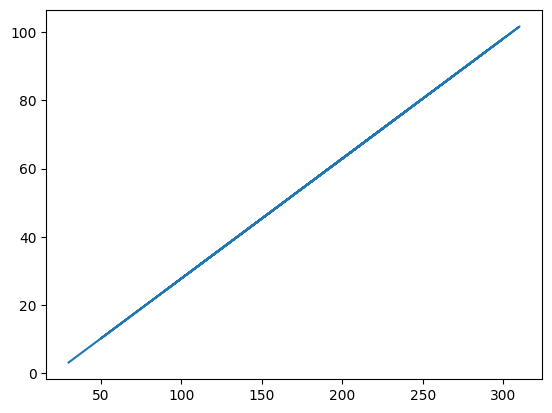

In [23]:
plt.plot(x, reg.predict(x))

Text(0.5, 1.0, 'Car driving risk analysis')

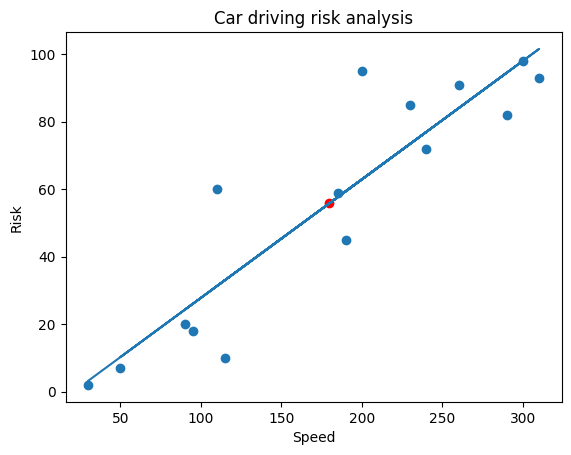

In [24]:
plt.plot(x, reg.predict(x))

plt.scatter(x.mean(), y.mean(), color='red')

plt.scatter(df['speed'], df['risk'])
plt.xlabel('Speed')
plt.ylabel('Risk')
plt.title('Car driving risk analysis')

In [25]:
df.head()

,speed,risk,Predicted_y
0,200,95,62.943434
1,90,20,24.298625
2,300,98,98.075079
3,110,60,31.324954
4,240,72,76.996092


In [26]:
df['lose'] = df['risk'] - df['Predicted_y']
df.head()

,speed,risk,Predicted_y,lose
0,200,95,62.943434,32.056566
1,90,20,24.298625,-4.298625
2,300,98,98.075079,-0.075079
3,110,60,31.324954,28.675046
4,240,72,76.996092,-4.996092


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [29]:
mse = mean_squared_error(df['risk'], df['Predicted_y'])
mse

208.39165973800417

In [30]:
mae = mean_absolute_error(df['risk'], df['Predicted_y'])
mae

10.740343292130886

In [31]:
abs(df['lose'])

0     32.056566
1      4.298625
2      0.075079
3     28.675046
4      4.996092
5     23.081537
6      3.245968
7     11.517072
8     14.430270
9      6.977579
10    12.561915
11     1.326312
12     8.588243
13     8.055208
14     1.219639
Name: lose, dtype: float64

In [32]:
sum(abs(df['lose'])) / len(x)

10.740343292130884

In [33]:
reg.score(x, y)

0.8260542394120296

Text(0.5, 1.0, 'Car driving risk analysis')

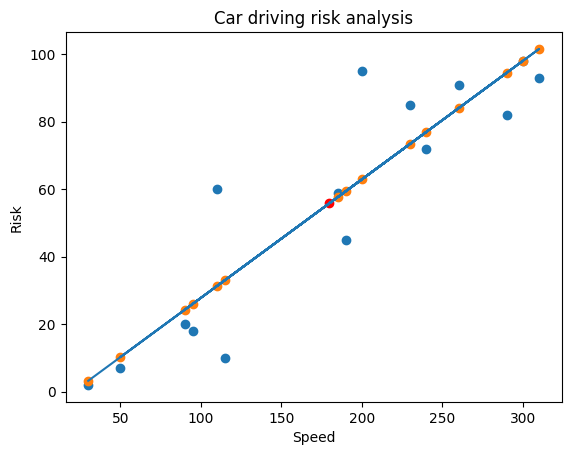

In [35]:
plt.plot(x, reg.predict(x))

plt.scatter(x.mean(), y.mean(), color='red')

plt.scatter(df['speed'], df['risk'])
plt.scatter(df['speed'], reg.predict(x))
plt.xlabel('Speed')
plt.ylabel('Risk')
plt.title('Car driving risk analysis')

In [36]:
reg.score(x, y)

0.8260542394120296

In [38]:
from sklearn.metrics import r2_score
r2_score(y, reg.predict(x))

0.8260542394120296